In [5]:
import sys
sys.path.insert(0, '../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [6]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [7]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [8]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

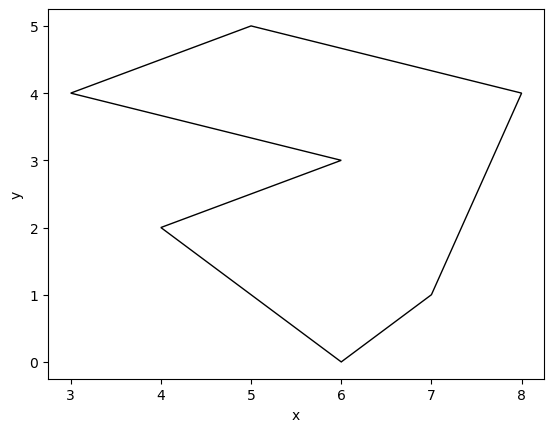

In [6]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [1]:
import matplotlib.pyplot as plt
%matplotlib tk

class PolygonBuilder:
    def __init__(self):
        self.polygon = []
        self.active = True
        self.tmp_line = None
        self.events = []

        # Konfiguracja wykresu
        self.fig, self.ax = plt.subplots()
        self.fig.canvas.manager.set_window_title("Kreator wielokąta")
        self.ax.set_title("Podwójne kliknięcie LPM: dodaj punkt\nPodwójne kliknięcie PPM: zakończ")
        self.ax.set_xlim([0, 2])
        self.ax.set_ylim([0, 2])
        
        # Podłączenie zdarzeń
        self.cid = self.fig.canvas.mpl_connect("button_press_event", self.on_click)

    def draw_point(self, x, y):
        """Rysuje punkt na wykresie."""
        self.ax.scatter(x, y, color="red")
        self.fig.canvas.draw()

    def draw_segment(self, p1, p2, style='solid', color='red', alpha=1.0):
        """Rysuje odcinek między dwoma punktami."""
        line, = self.ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 
                             linestyle=style, color=color, linewidth=1.0, alpha=alpha)
        self.fig.canvas.draw()
        return line

    def update_phantom_line(self):
        """Aktualizuje przerywaną linię zamykającą (podgląd)."""
        if self.tmp_line is not None:
            self.tmp_line.remove()
            self.tmp_line = None

        if len(self.polygon) >= 3 and self.active:
            self.tmp_line = self.draw_segment(
                self.polygon[-1], self.polygon[0], 
                style='dashed', color='gray', alpha=0.5
            )

    def add_point(self, event):
        """Logika dodawania punktu (LPM)."""
        x, y = event.xdata, event.ydata
        self.polygon.append((x, y))
        self.events.append(event)
        
        self.draw_point(x, y)
        
        # Rysuj linię do poprzedniego punktu
        if len(self.polygon) > 1:
            self.draw_segment(self.polygon[-2], self.polygon[-1])
        
        self.update_phantom_line()

    def finish_polygon(self):
        """Logika kończenia wielokąta (PPM)."""
        if self.tmp_line is not None:
            self.tmp_line.remove()
            self.tmp_line = None
        
        # Rysuj linię zamykającą
        self.draw_segment(self.polygon[-1], self.polygon[0])
        self.active = False
        plt.pause(0.5)

    def on_click(self, event):
        """Główny handler zdarzeń myszy."""
        if not self.active or not event.dblclick:
            return

        # Lewy przycisk myszy (1) - Dodaj punkt
        if event.button == 1:
            if event.xdata is not None and event.ydata is not None:
                self.add_point(event)

        # Prawy przycisk myszy (3) - Zakończ
        elif event.button == 3 and len(self.polygon) > 2:
            self.finish_polygon()

# Uruchomienie aplikacji
if __name__ == "__main__":
    plt.ion() # Tryb interaktywny (zachowany z oryginału)
    builder = PolygonBuilder()
    polygon = builder.polygon
    plt.tight_layout()
    plt.show(block=True) # block=True aby okno nie zniknęło od razu w skrypcie

%matplotlib inline
    

In [10]:
%matplotlib inline

In [11]:
"""
zapisywanie wygenerowanego poligonu do pliku txt
"""

if len(polygon) < 2: print("Za malo punktow (<3)")
else:
    draw_polygon(polygon)
    print(polygon)
    f = open("polygon.txt", "w")
    f.write(str(polygon))
    f.close()

[(np.float64(0.7269261637239164), np.float64(1.5130424779270082)), (np.float64(1.4745184590690206), np.float64(1.4716286560639613)), (np.float64(1.2325441412520062), np.float64(0.7313565902619998)), (np.float64(0.4741171749598715), np.float64(0.7727704121250466))]


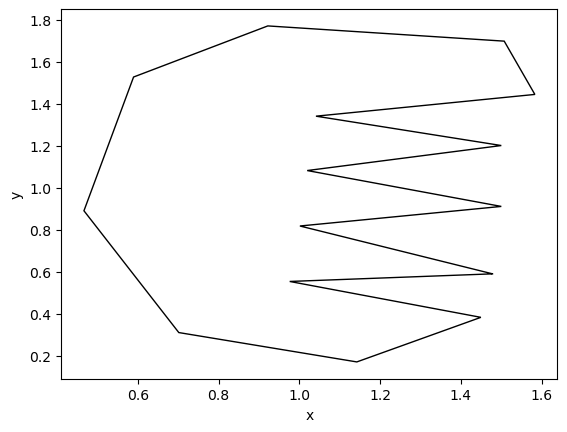

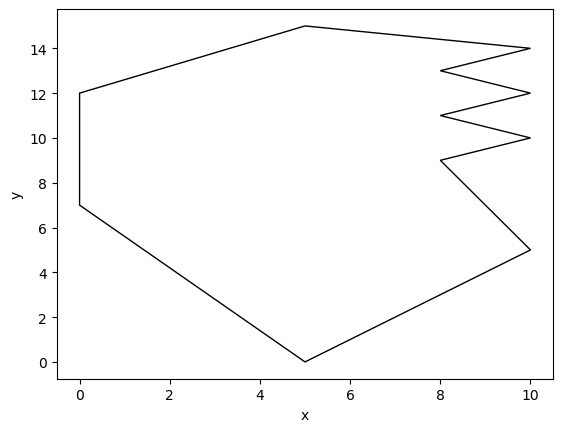

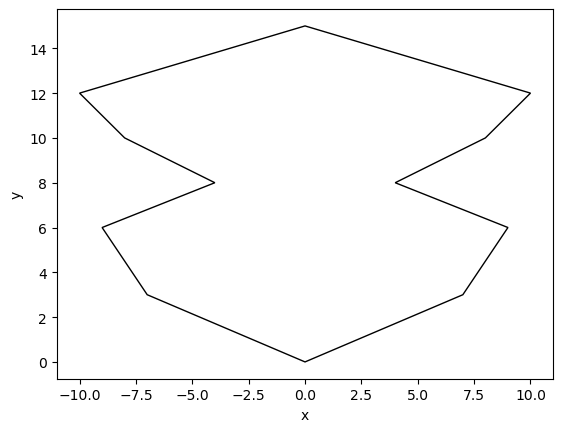

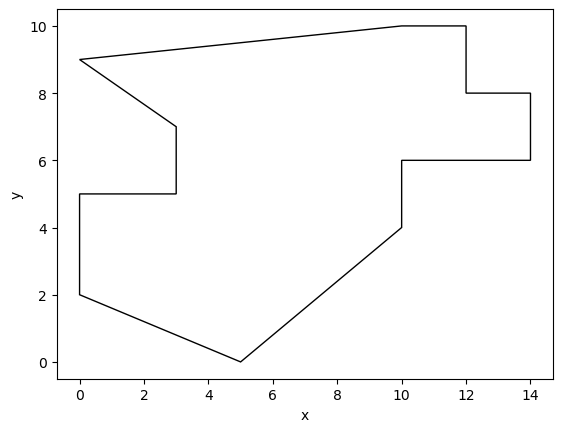

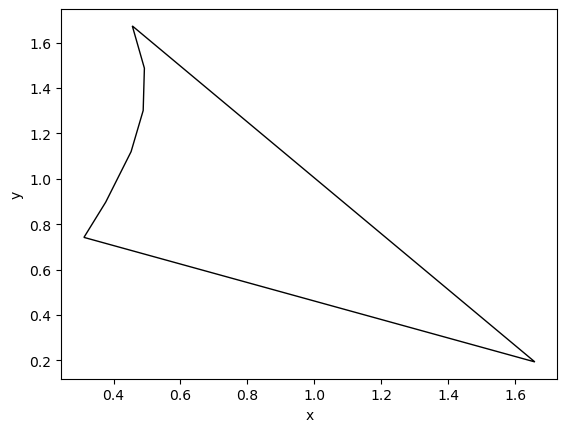

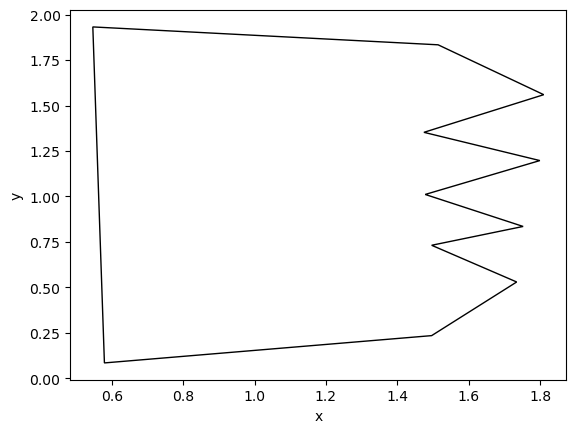

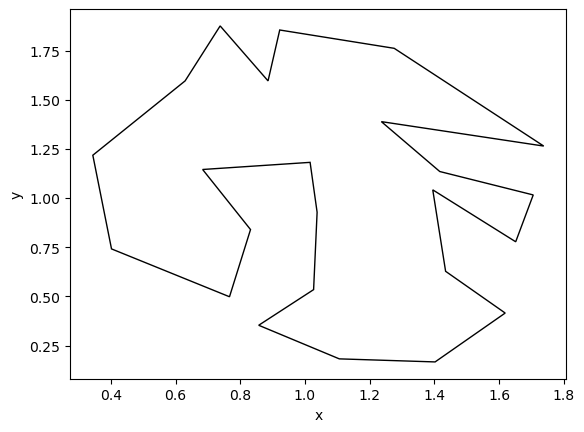

In [6]:
A = [
    (1.5070224719101122, 1.6994046763107185), 
    (0.9219502407704654, 1.7718788645710504), 
    (0.5896869983948634, 1.5285726611256507), 
    (0.4668940609951845, 0.8918351499813061), 
    (0.7016452648475119, 0.3120416438986511), 
    (1.1422552166934188, 0.17226999511086816), 
    (1.4492375601926162, 0.384515832158983), 
    (0.9761235955056178, 0.555347847344051), 
    (1.4781300160513642, 0.5915849414742169), 
    (1.4781300160513642, 0.5915949414742169), 
    (1.0014044943820224, 0.8193609617209744), 
    (1.4997993579454252, 0.9125420609128295), 
    (1.0194622792937398, 1.0833740760978974), 
    (1.4997993579454252, 1.2024388139541573), 
    (1.0411316211878008, 1.34221046274194), 
    (1.5828651685393256, 1.445745017399557)
]

B = [
    (0.0, 12.0),
    (0.0, 7.0),
    (5.0, 0.0),
    (10.0, 5.0),
    (8.0, 9.0),
    (10.0, 10.0),
    (8.0, 11.0),
    (10.0, 12.00001),
    (8.0, 13.0),
    (10.0, 14.0),
    (5.0, 15.0)
]

C = [
    (-10.0, 12.0),
    (-8.0, 10.0),
    (-4.0, 8.0),
    (-9.0, 6.0),
    (-7.0, 3.0),
    (0.0, 0.0),
    (7.0, 3.00001),   
    (9.0, 6.00001),   
    (4.0, 8.00001),   
    (8.0, 10.00001),  
    (10.0, 12.00001), 
    (0.0, 15.0)
]

D = [
    (0.0, 9.0),
    (3.0, 7.0),
    (3.0, 5.00001),
    (0.0, 5.0),   
    (0.0, 2.0),
    (5.0, 0.0),
    (10.0, 4.0),
    (10.0, 6.0),
    (14.0, 6.00001),  
    (14.0, 8.0),
    (12.0, 8.00001),  
    (12.0, 10.0),
    (10.0, 10.00001)  
]


E = [(np.float64(0.456059390048154), np.float64(1.6735210376463145)), (np.float64(0.492174959871589), np.float64(1.4871588392626038)), (np.float64(0.4885634028892455), np.float64(1.3007966408788931)), (np.float64(0.4524478330658105), np.float64(1.1196111702280636)), (np.float64(0.376605136436597), np.float64(0.897011877714187)), (np.float64(0.311597110754414), np.float64(0.7417100457277616)), (np.float64(1.658707865168539), np.float64(0.1929769060423916))]

F = [
    (0.5788523274478329, 0.08426562365189377), 
    (1.4961878009630816, 0.23439072790543836), 
    (1.7345505617977526, 0.5294642086796467), 
    (1.4961878009630816, 0.7313565902619998), 
    (1.75260834670947, 0.8348911449196169), 
    (1.4781300160513642, 1.010899887837566), 
    (1.7995585874799356, 1.1972620862212762), 
    (1.4745184590690206, 1.3525639182077018), 
    (1.810393258426966, 1.5596330275229358), 
    (1.5142455858747992, 1.8339995973656205), 
    (0.5463483146067415, 1.9323574242903567)
]

polygon = [
    (0.6294141252006419, 1.5958701216531015), 
    (0.3441011235955055, 1.2179689971527998), 
    (0.4018860353130015, 0.7417100457277616), 
    (0.7666532905296949, 0.4984038422823617), 
    (0.8316613162118778, 0.8400678726524976), 
    (0.6835874799357944, 1.145494808892468), 
    (1.0158507223113964, 1.1817319030226336), 
    (1.0375200642054572, 0.928072244111472), 
    (1.0266853932584268, 0.5346409364125276), 
    (0.8569422150882824, 0.35345546576169784), 
    (1.1061396468699838, 0.18262345057662988), 
    (1.4022873194221506, 0.16709326737798735), 
    (1.6189807383627606, 0.41557619855626804), 
    (1.4347913322632422, 0.6278220356043829), 
    (1.3950642054574636, 1.041960254234851), 
    (1.651484751203852, 0.7779471398579275), 
    (1.7056581059390046, 1.0160766155704466), 
    (1.4167335473515246, 1.135141353426706), 
    (1.2361556982343498, 1.3888010123378676), 
    (1.738162118780096, 1.2645595467487274), 
    (1.2758828250401282, 1.7615254091052885), 
    (0.9219502407704654, 1.8547065082971441), 
    (0.8858346709470304, 1.5958801216531015), 
    (0.7377608346709469, 1.8754134192286673)
]

polygons = [A, B, C, D, E, F, polygon]

for pol in polygons:
    draw_polygon(pol)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [8]:
def find_min_max(T):
    n = len(T)
    min_val = T[0][1]
    min_ind = 0
    max_val = T[0][1]
    max_ind = 0
    
    for i in range(1, n):
        val = T[i][1]
        if val < min_val:
            min_val = val
            min_ind = i
            
        if max_val < val:
            max_val = val
            max_ind = i
            
    return min_ind, max_ind

In [9]:


def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    n = len(polygon)
    min_ind, max_ind = find_min_max(polygon)
    
    i = min_ind
    while i != max_ind:
        j = (i + 1) % n
        if polygon[j][1] <= polygon [i][1]: return False
        i = j
        
    while i != min_ind:
        j = ( i+ 1) % n
        if polygon[i][1] <= polygon[j][1]: return False
        i = j
        
    return True

Przeprowadź test poprawności powyższej funkcji.

In [10]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Sprawdź monotoniczność swojego wielokątu.

In [11]:
print(is_y_monotonic(polygons[0]))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

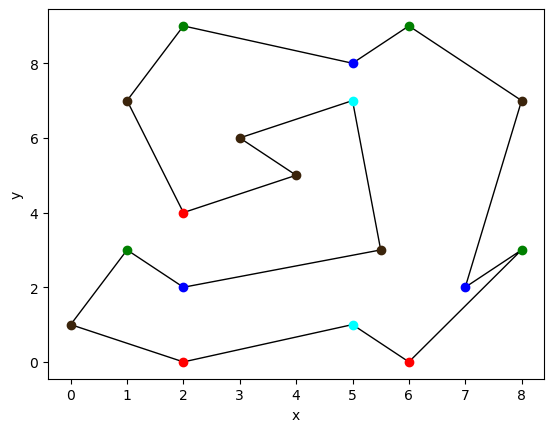

In [11]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [12]:
def orientation(a, b, c):
    return a[0]*b[1] + c[0]*a[1] + b[0]*c[1] - c[0]*b[1] - a[0]*c[1] - b[0]*a[1]

In [13]:


def color_vertex(polygon, eps=1e-24):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    colors = [None for _ in range(n)]
    
    for i in range(n):
        prev = polygon[i-1]
        curr = polygon[i]
        next = polygon[(i+1)%n]
        orient = orientation(prev, curr, next)
        
        if prev[1] < curr[1] and next[1] < curr[1]:
            if orient > eps:
                colors[i] = 0
            elif orient < -eps:
                colors[i] = 3
            else: colors[i] = 4
            
        elif curr[1] < prev[1] and curr[1] < next[1]:
            if orient > eps:
                colors[i] = 1
            elif orient < -eps:
                colors[i] = 2
            else: colors[i] = 4
            
        else: colors[i] = 4
        
    return colors

Przeprowadź test poprawności powyższej funkcji. 

In [14]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

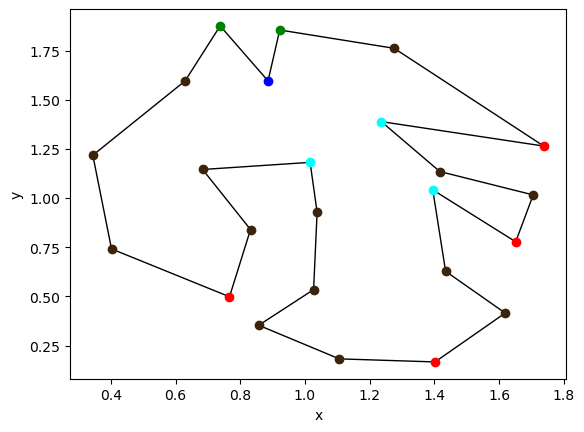

In [15]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

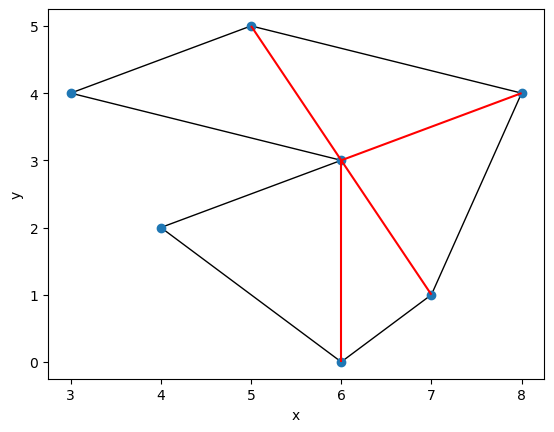

In [16]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [60]:
def group_chains(polygon):
    """
    Funckcja grupuje punkty w poligonie w dwa lancuchy, wierzcholek poczatkowy i koncowy jest zalicznay do lewego lancucha
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica boolean, na kazdym indesie jest informacja czy wierzcholek o takim indeksie w polygon znajduje sie w lewym lancuchu - True, czy w prawym - False
            dwie tablice int skladajace sie z punktow nalezacych do odpowiednio prawego i lewego lancucha oraz ich indeksu w orginalnym poligonie
    """
    n = len(polygon)
    in_right_chain = [False for _ in range(n)]
    right_chain = []
    left_chain = []
    min_, max_ = find_min_max(polygon)
    
    ind = max_
    while ind != min_: # przejscie prawym lancuchem
        in_right_chain[ind] = True
        right_chain.append((polygon[ind][0], polygon[ind][1], ind))
        ind = (n + ind - 1) % n
    in_right_chain[min_] = True
    right_chain.append((polygon[min_][0], polygon[min_][1], min_))
    
    ind = (max_ + 1) % n
    while ind != min_: # przejscie lewym lancuchem
        left_chain.append((polygon[ind][0], polygon[ind][1], ind))
        ind = (ind + 1) % n
    
    return in_right_chain, right_chain, left_chain


In [64]:
def merge_chains(right_chain, left_chain):
    """
    Funkcja scala ze soba dwa lancuchy punktow w taki sposob ze punkty w powstalym poligonie sa posortowane malejaco wzgledem y
    Args:
        right_chain, left_chain (list<(float, float, int)>): listy krotek reprezantujace dwa lancuchy punktow skladajace sie na poligon
    """
    n = len(right_chain) + len(left_chain)
    sorted_polygon = [None for _ in range(n)]
    
    
    left_ind = 0
    right_ind = 0
    ind = 0
    while ind < n:
        if len(right_chain) <= right_ind or len(left_chain) <= left_ind: break
        
        elif right_chain[right_ind][1] > left_chain[left_ind][1]:
            sorted_polygon[ind] = right_chain[right_ind]
            right_ind += 1
        else:
            sorted_polygon[ind] = left_chain[left_ind]
            left_ind += 1
        
        ind += 1
            
    while right_ind < len(right_chain):
        sorted_polygon[ind] = right_chain[right_ind]
        ind += 1
        right_ind += 1
        
    while left_ind < len(left_chain):
        sorted_polygon[ind] = left_chain[left_ind]
        ind += 1
        left_ind += 1
        
            
    return sorted_polygon


In [61]:
def are_neighbors(a, b, n):
    """
    Funkcja sprawdza czy dwa punkty a i b sasiaduja ze soba w poligonie tzn czy laczy je krawedz
    Args:
        dwie krotki (float, float) - dwa punkty ktorych sasiedztwo sprawdzam
        n (int) - ilosc punktow w poligonie
    Returns: 
        boolean - True jesli sasiaduja, False jesli nie
    """
    return abs(a[2] - b[2]) == 1 or abs(a[2] - b[2]) == n - 1


In [62]:
def triangulation(polygon, eps=1e-24):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    n = len(polygon)
    in_right_chain, right_chain, left_chain = group_chains(polygon)
    triangulation = []
    sorted_polygon = merge_chains(right_chain, left_chain)
    
    stack = []
    stack.append(sorted_polygon[0])
    stack.append(sorted_polygon[1])
    
    for i in range(2, n):
        point = sorted_polygon[i]
        top = stack[-1]
        if in_right_chain[point[2]] != in_right_chain[top[2]]: #punkty sa z roznych lancuchow, wiec moge kazdy punkt na stosie polaczyc przekontna z aktualnie przetwarzanym punktem
            while len(stack) > 0:
                if not are_neighbors(stack[-1], point, n): # punkty nie sasiaduja ze soba w grafie
                    triangulation.append((stack[-1][2], point[2]))
                stack.pop()
                
            stack.append(top)
            stack.append(point)
            
        else: #punkty sa z jednego lancucha
            while len(stack) > 1 and \
                ((in_right_chain[point[2]] and orientation(stack[-2], stack[-1], point) < -eps) or \
                (not in_right_chain[point[2]] and orientation(stack[-2], stack[-1], point) > eps)): # trojkat tworzony przez aktualnie przetwarzany punkt i 2 ostatnie na stosie nalezy do grafu
                if not are_neighbors(point, stack[-2], n): 
                    triangulation.append((point[2], stack[-2][2]))
                stack.pop()
            stack.append(point)
            
    for i in range(len(triangulation)): # na koniec redaguje przekatne, tak aby punkt o mnijeszym indeksie w poligonie byl pierwszy w krotce
        triangulation[i] = (min(triangulation[i]), max(triangulation[i]))
            
    return triangulation


Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: do przechowywania poligonu używam listy wierzchołkow, ustawione są w kolejności przeciwnej od ruchu wskazówek zegara.
Triangulacja to lista krotek (int, int), każda krotka (ind1, ind2) symbolizuje przekatna jaką trzeba dodac miedzy punktami o indeksach ind1 i ind2 tak aby poprawnie przeprowadzic triangulacje.

Przeprowadź testy poprawności powyższej funkcji.


In [65]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

Time: 0.000s


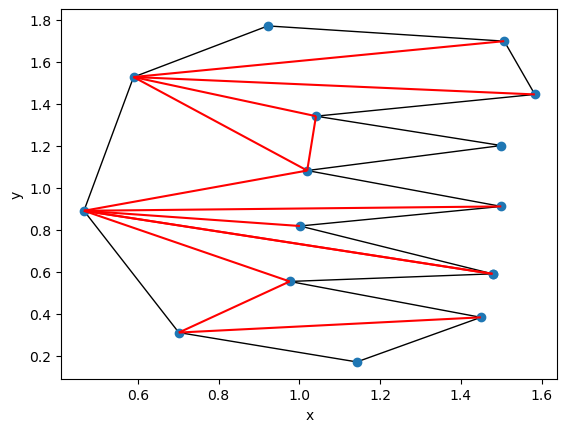

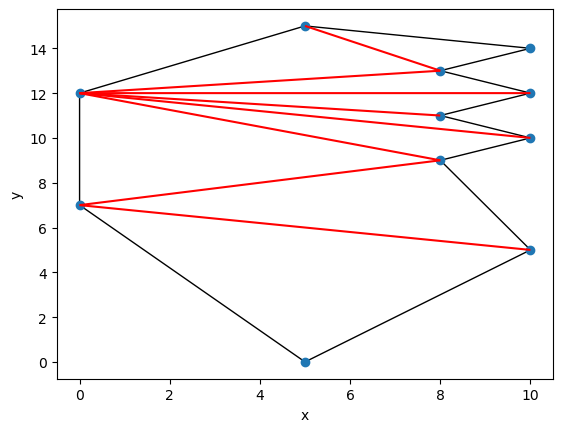

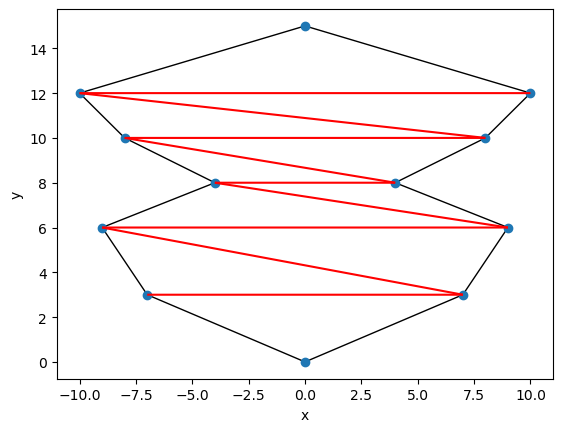

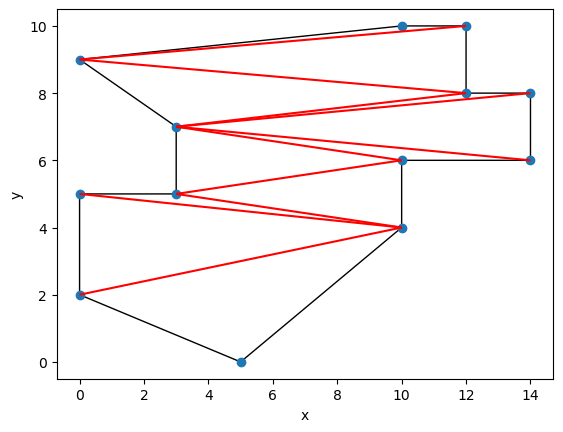

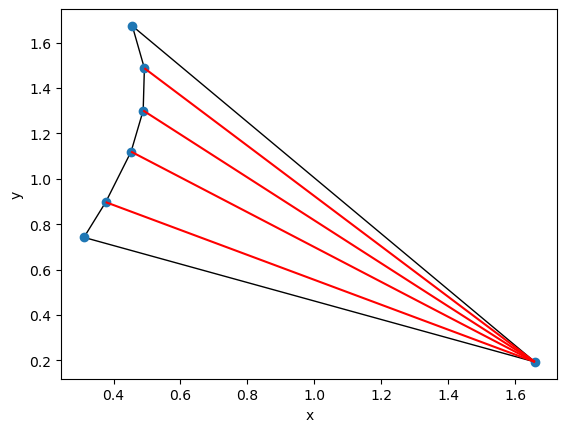

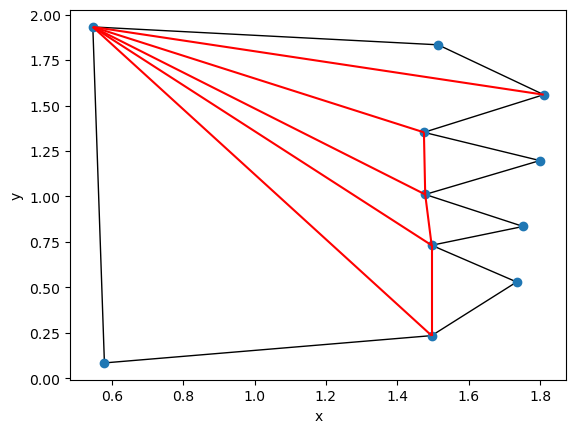

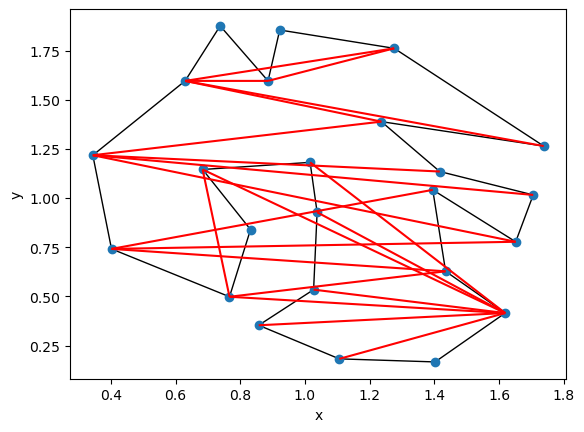

In [66]:
polygon = polygons[4]
tri = triangulation(polygon)

for polygon in polygons:
    tri = triangulation(polygon)
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

In [91]:
def triangulation_draw(polygon, eps=1e-24):
    
    """
    Wersja funkcji triangular(polygon) z dodana implementacja klasy Visualizer pozniej uzytej do wygenerowania gifow pokazujacych przebieg dzialania algorytmu

    """
    
    vis = Visualizer()
    vis.add_point(polygon, color="black")
    edges = []
    for i in range(1, len(polygon)):
        #vis.add_line_segment([polygon[i], polygon[i-1]], color="blue")
        edges.append([polygon[i], polygon[i-1]])
    edges.append([polygon[0], polygon[-1]])
    vis.add_line_segment(edges, color="black")
    
    n = len(polygon)
    new_polygon = [None for _ in range(n)]
    in_right_chain, _, _ = group_chains(polygon)
    triangulation = []
    for i in range(n):
        new_polygon[i] = (polygon[i][0], polygon[i][1], i) #do krotki ze wspolzednymi punktu dodaje indeks w oryginalnej tablicy
    sorted_polygon = sorted(new_polygon, key=lambda p: (-p[1], p[0]))
    
    stack = []
    stack.append(sorted_polygon[0])
    stack.append(sorted_polygon[1])
    vis.add_point(polygon[stack[-2][2]], color="red")
    vis.add_point(polygon[stack[-1][2]], color="red")
    
    for i in range(2, n):
        point = sorted_polygon[i]
        top = stack[-1]
        vis.add_point(polygon[point[2]], color="cyan")
        if in_right_chain[point[2]] != in_right_chain[top[2]]: #punkty sa z roznych lancuchow
            while len(stack) > 0:
                if not are_neighbors(stack[-1], point, n): # punkty nie sasiaduja ze soba w grafie
                    triangulation.append((stack[-1][2], point[2]))
                    vis.add_line_segment([polygon[stack[-1][2]], polygon[point[2]]], color="red")
                vis.add_point(polygon[stack[-1][2]], color="pink")
                stack.pop()
            
            stack.append(top)
            stack.append(point)
            vis.add_point([polygon[point[2]], polygon[top[2]]], color="red")
            
        else: #punkty sa z jednego lancucha
            while len(stack) > 1 and \
                ((in_right_chain[point[2]] and orientation(stack[-2], stack[-1], point) < -eps) or \
                (not in_right_chain[point[2]] and orientation(stack[-2], stack[-1], point) > eps)): # trojkat tworzony przez 3 punkty nalezy do grafu
                if not are_neighbors(point, stack[-2], n): 
                    triangulation.append((point[2], stack[-2][2]))
                    vis.add_line_segment([polygon[stack[-2][2]], polygon[point[2]]], color="red")
                vis.add_point(polygon[stack[-1][2]], color="pink")
                stack.pop()
            stack.append(point)
            vis.add_point(polygon[point[2]], color="red")
            
    for i in range(len(triangulation)):
        triangulation[i] = (min(triangulation[i]), max(triangulation[i]))
            
    return triangulation, vis

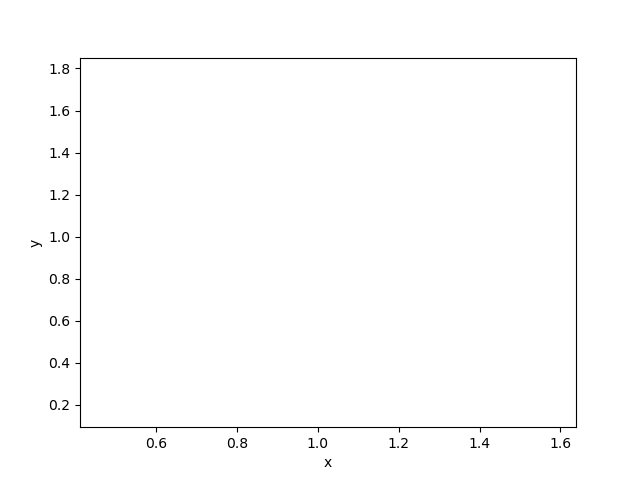

In [92]:
_, vis = triangulation_draw(A)
vis.show_gif()

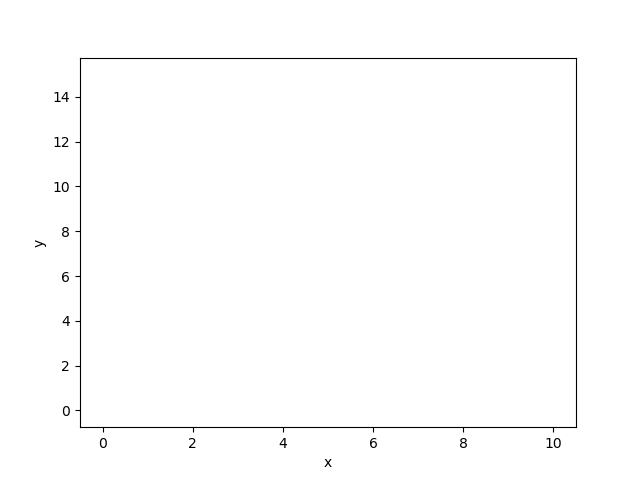

In [93]:
_, vis = triangulation_draw(B)
vis.show_gif()

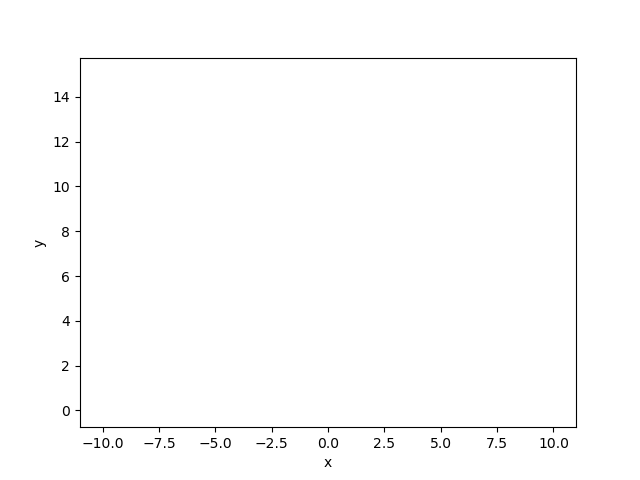

In [94]:
_, vis = triangulation_draw(C)
vis.show_gif()

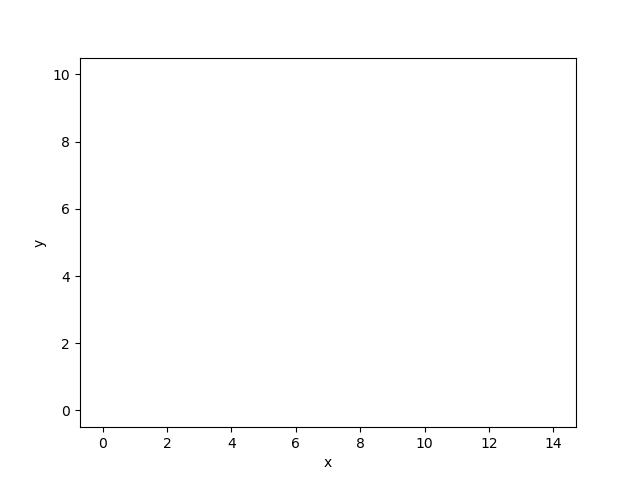

In [95]:
_, vis = triangulation_draw(D)
vis.show_gif()

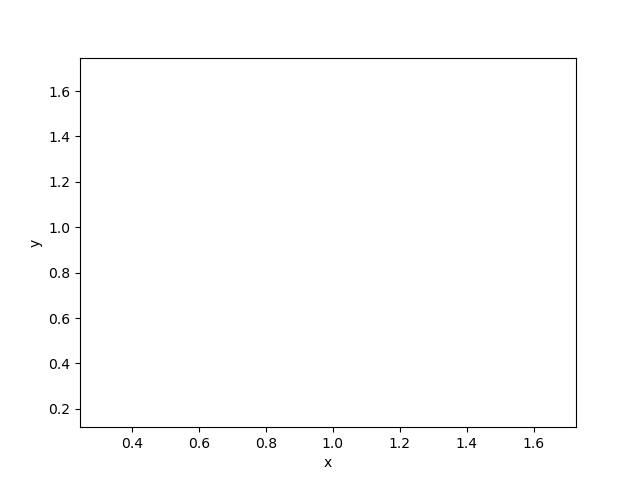

In [96]:
_, vis = triangulation_draw(E)
vis.show_gif()

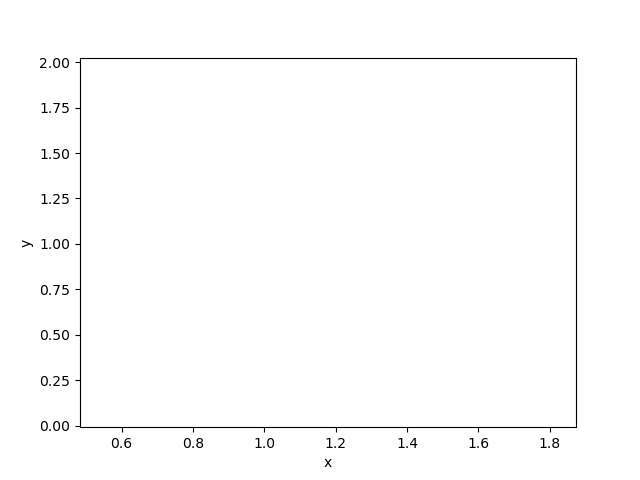

In [97]:
_, vis = triangulation_draw(F)
vis.show_gif()